# filtered exon 678 table S2 new ZGA list

SLAMseq resolves the kinetics of maternal and zygotic gene expression during early zebrafish embryogenesis  
Cell Reports  
Bhat et al  (Supple Table 4)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")
tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


In [3]:
tr_gene_pd_clean = pd.DataFrame(zip(list(zip(*tr_gene_symbol_pd['transcript_id'].str.split('.')))[0], list(zip(*tr_gene_symbol_pd['gene_id'].str.split('.')))[0]))
tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean']
tr_gene_pd_clean

,transcript_id_clean,gene_id_clean
0,ENSDART00000164359,ENSDARG00000099104
1,ENSDART00000158290,ENSDARG00000099104
2,ENSDART00000157701,ENSDARG00000099104
3,ENSDART00000167898,ENSDARG00000099104
4,ENSDART00000166393,ENSDARG00000102407
...,...,...
65835,ENSDART00000183313,ENSDARG00000114956
65836,ENSDART00000183313,ENSDARG00000114956
65837,ENSDART00000183313,ENSDARG00000114956
65838,ENSDART00000183313,ENSDARG00000114956


## TPM

In [4]:
expr_filtered_exon_gene_clean_embryoTissue = pd.read_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50_TPM6_TPM0p8.tsv',
    sep = "\t"
)
expr_filtered_exon_gene_clean_embryoTissue

,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,256_cell,1k_cell,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
0,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,1.638048,1.325248,...,0.000000,0.000000,0.034695,0.000000,0.379854,0.044401,0.137369,0.102580,0.019069,0.547866
1,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,8.795153,1.206307,...,0.000000,0.000000,0.000000,0.000000,0.008595,0.012036,0.000000,0.000000,0.000000,0.000000
2,ENSDART00000146065.4.15_ENSDART00000114876.5.8,7.492041,0.711239,0.000000,2.600014,1.402099,3.311170,1.498341,3.659217,1.108041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508645
3,ENSDART00000131423.2.1_ENSDART00000146769.3.1_...,3.350398,128.124962,0.000000,0.000000,8.736819,14.086681,5.165328,10.660354,14.130716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328753,0.000000,0.000000,0.000000,0.000000
4,ENSDART00000146769.3.2,0.496100,56.002764,0.000000,0.000000,1.388397,0.546761,2.589212,2.036049,3.714153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,ENSDART00000154125.3_4.6,0.000000,0.000000,0.000000,0.000000,0.070596,0.000000,0.000000,0.006236,0.384603,...,0.042960,0.000000,0.000000,0.030846,0.033788,0.000000,0.103027,0.156631,0.012832,0.092297
726,ENSDART00000154125.3_4.11,0.000000,0.000000,0.000000,0.000000,0.172569,0.000000,0.000000,0.015076,1.057877,...,0.207974,0.085981,0.000000,0.033883,0.065620,0.000000,0.291242,0.070771,0.070608,0.234709
727,ENSDART00000154125.3_5.6,0.000000,0.011114,0.000000,0.000000,0.133349,0.000000,0.022456,0.000000,0.394836,...,0.000000,0.019644,0.000000,0.000000,0.043361,0.024072,0.068684,0.139917,0.045718,0.040618
728,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,0.712752,0.215931,...,0.000000,0.000000,0.784810,0.000000,0.035153,0.021998,0.085799,0.000000,0.000000,0.007882


In [5]:
exon_id_ls = expr_filtered_exon_gene_clean_embryoTissue['exon_id'].tolist()

In [6]:
exon_gene_id_dict = {}
exon_gene_id_dict_nonUniq = {}
for exon_id in set(exon_id_ls) :
    trans_ids = [('ENSDART'+x).strip('_') for x in exon_id.split('ENSDART') if x]    
    gene_ids = []
    for trans_id in trans_ids :
        gene_id_series = tr_gene_pd_clean.loc[tr_gene_pd_clean['transcript_id_clean'] == trans_id.split('.')[0]]['gene_id_clean'].tolist()
        if gene_id_series : 
            gene_ids.append(gene_id_series[0])
        else :
            print(exon_id)
        
    if len(set(gene_ids)) == 1 :
        exon_gene_id_dict[exon_id] = gene_ids[0]
    else :
#         print(gene_ids, exon_id)
        exon_gene_id_dict_nonUniq[exon_id] = gene_ids
        

In [7]:
exon_tr_gene_pd_clean = pd.merge(tr_gene_pd_clean, pd.DataFrame.from_dict(exon_gene_id_dict, orient='index').reset_index(), 
                                  left_on = 'gene_id_clean', right_on = 0).iloc[:,:-1]
exon_tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean', 'exon_id']
exon_tr_gene_pd_clean

,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6
...,...,...,...
2330,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3
2331,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3
2332,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1
2333,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1


## K36

In [8]:
filtered_tail2of3_exon_H3K36me3_dome_RPKM = pd.merge(tr_gene_symbol_pd, 
                                                      pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/H3K36me3/filtered_tail2of3_exon_H3K36me3_dome_RPKM.txt',
              sep = '\t', header = None, names = ['transcript_id','RPKM','Exon_ids','Strand','Len_2of3Exon','Chr']),
                                                                   on = 'transcript_id').drop_duplicates()
filtered_tail2of3_exon_H3K36me3_dome_RPKM

,transcript_id,gene_id,gene_symbol,RPKM,Exon_ids,Strand,Len_2of3Exon,Chr
0,ENSDART00000171547.1,ENSDARG00000102746.2,tmem39a,0.354636,"ENSDART00000171547.1.1,ENSDART00000171547.1.2,...",-,976,chr1
1,ENSDART00000168091.1,ENSDARG00000102746.2,tmem39a,0.254046,"ENSDART00000168091.1.1,ENSDART00000168091.1.2,...",-,1465,chr1
2,ENSDART00000164075.1,ENSDARG00000102746.2,tmem39a,0.609956,"ENSDART00000164075.1.1,ENSDART00000164075.1.2,...",-,600,chr1
3,ENSDART00000170183.1,ENSDARG00000102746.2,tmem39a,0.852736,"ENSDART00000170183.1.1,ENSDART00000170183.1.2,...",-,326,chr1
4,ENSDART00000165693.1,ENSDARG00000102746.2,tmem39a,0.728300,"ENSDART00000165693.1.1,ENSDART00000165693.1.2,...",-,272,chr1
...,...,...,...,...,...,...,...,...
8812,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",+,1726,chr4
8813,ENSDART00000144849.3,ENSDARG00000095486.4,CU467646.2,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",+,506,chr4
8814,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",+,1737,chr4
8815,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",+,1736,chr4


## pol2

In [9]:
filtered_pol2_signal_RPKM = {}
for k in ['4H8', '8WG16'] :
    filtered_pol2_signal_RPKM[k] = pd.merge(pd.read_table(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/pol2_signal/filtered_pol2_dome_signal_{k}.tsv',
                                                sep = '\t', header = None, names = ['transcript_id', 'size', 'covered', 'sum', 'mean0', 'mean']),
                                            tr_gene_symbol_pd, on = 'transcript_id'
                                           )
    filtered_pol2_signal_RPKM[k]['RPKM'] = filtered_pol2_signal_RPKM[k]['mean0'] / 4.0
    
    
filtered_pol2_signal_RPKM[k]

,transcript_id,size,covered,sum,mean0,mean,gene_id,gene_symbol,RPKM
0,ENSDART00000171547.1,4000,4000,2493.450,0.623362,0.623362,ENSDARG00000102746.2,tmem39a,0.155840
1,ENSDART00000168091.1,4000,4000,2508.090,0.627022,0.627022,ENSDARG00000102746.2,tmem39a,0.156755
2,ENSDART00000164075.1,4000,4000,2498.410,0.624601,0.624601,ENSDARG00000102746.2,tmem39a,0.156150
3,ENSDART00000170183.1,4000,4000,2325.290,0.581323,0.581323,ENSDARG00000102746.2,tmem39a,0.145331
4,ENSDART00000165693.1,4000,4000,2501.920,0.625481,0.625481,ENSDARG00000102746.2,tmem39a,0.156370
...,...,...,...,...,...,...,...,...,...
1367,ENSDART00000135441.3,4000,4000,794.753,0.198688,0.198688,ENSDARG00000006600.10,lsm14aa,0.049672
1368,ENSDART00000147093.2,4000,4000,926.876,0.231719,0.231719,ENSDARG00000006600.10,lsm14aa,0.057930
1369,ENSDART00000152329.3,4000,4000,487.121,0.121780,0.121780,ENSDARG00000096603.3,bmb,0.030445
1370,ENSDART00000152649.2,4000,4000,485.998,0.121499,0.121499,ENSDARG00000096603.3,bmb,0.030375


In [10]:
filtered_pol2_signal_RPKM_2ab = pd.merge(filtered_pol2_signal_RPKM['4H8'][['transcript_id', 'RPKM']], filtered_pol2_signal_RPKM['8WG16'][['transcript_id', 'RPKM']], on = 'transcript_id') 
filtered_pol2_signal_RPKM_2ab.columns = ['transcript_id', 'Pol II (4H8) RPKM', 'Pol II (8WG16) RPKM']
filtered_pol2_signal_RPKM_2ab

,transcript_id,Pol II (4H8) RPKM,Pol II (8WG16) RPKM
0,ENSDART00000171547.1,0.305880,0.155840
1,ENSDART00000168091.1,0.307850,0.156755
2,ENSDART00000164075.1,0.307202,0.156150
3,ENSDART00000170183.1,0.285077,0.145331
4,ENSDART00000165693.1,0.307500,0.156370
...,...,...,...
1367,ENSDART00000135441.3,0.092428,0.049672
1368,ENSDART00000147093.2,0.094076,0.057930
1369,ENSDART00000152329.3,0.059998,0.030445
1370,ENSDART00000152649.2,0.060623,0.030375


## ZGA list

In [11]:
gene_zygotic_transcribed = pd.read_excel('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/public_ZGA_genes/cell_reports_2023.xlsx', 
                            sheet_name = 'Sheet1', header = 0)
gene_zygotic_transcribed = gene_zygotic_transcribed.loc[gene_zygotic_transcribed['classification'].isin(['MZ', 'Z'])]
gene_zygotic_transcribed

,Gene ID,RPM_R1_TP1,RPM_R1_TP2,RPM_R1_TP3,RPM_R1_TP4,RPM_R1_TP5,RPM_R1_TP6,RPM_R1_TP7,RPM_R1_TP8,RPM_R1_TP9,...,RPM_R2_TP2,RPM_R2_TP3,RPM_R2_TP4,RPM_R2_TP5,RPM_R2_TP6,RPM_R2_TP7,RPM_R2_TP8,RPM_R2_TP9,classification,sub classification
2985,march6,215.057391,133.434521,160.109018,180.343486,171.623546,224.664408,176.823997,199.475844,151.987655,...,220.380639,189.960359,156.071281,175.008314,186.439323,182.678032,188.336215,185.018369,MZ,MZ constant
2986,march8,82.227826,92.848188,88.276323,83.314576,102.777021,55.542034,57.483420,113.821951,40.677961,...,70.594209,35.757244,70.745114,34.573944,68.612545,85.343791,60.522420,47.293124,MZ,MZ constant
2987,sept15,63.954976,53.373809,62.930880,72.171680,48.572702,60.534577,67.168126,86.228751,60.277342,...,54.982028,72.259431,49.683591,58.811348,82.263208,61.010231,92.376325,88.834381,MZ,MZ constant
2988,sept2,86.444637,64.493352,72.327240,98.228914,50.966139,39.940339,62.481978,89.390472,46.594755,...,65.616412,59.595407,54.003903,58.811348,108.127623,81.817188,91.978151,106.409528,MZ,MZ constant
2989,sept6,73.794203,50.037945,49.207250,64.971655,41.955551,39.316271,44.049794,69.845288,36.240365,...,59.733561,50.904410,39.422849,42.771889,71.845597,63.478853,61.318768,78.608841,MZ,MZ constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10337,znf974,1.405604,0.000000,1.730908,1.200004,1.830276,0.624068,1.874459,12.646883,8.875192,...,0.452527,0.248314,1.080078,1.069297,4.669964,4.937244,3.981738,7.669155,Z,Z
10338,znf983,0.000000,0.000000,0.247273,0.171429,0.281581,0.000000,0.000000,1.437146,7.026193,...,2.715162,1.986514,0.000000,2.851459,1.077684,2.115962,7.565302,8.627800,Z,Z
10339,znf987,1.405604,0.555977,0.123636,0.000000,0.000000,4.368475,7.185427,32.479496,11.833589,...,0.000000,0.000000,0.000000,0.000000,2.873824,25.038881,32.650253,26.842043,Z,Z
10340,znf995,2.811208,0.000000,0.247273,0.171429,0.844743,36.820000,86.225129,167.283777,107.611697,...,0.226263,0.000000,0.000000,1.782162,41.670446,123.078442,133.388228,194.285265,Z,Z


## CDD

In [12]:
# hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomains.csv')
hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomain2.csv')
hitdata_df_filtered_knownDomain['gene_symbol'] = hitdata_df_filtered_knownDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
len(hitdata_df_filtered_knownDomain['gene_symbol'].unique())

68

In [19]:
set(hitdata_df_filtered_knownDomain['gene_symbol'].unique().tolist()) - set(tr_gene_symbol_pd['gene_symbol'].unique().tolist())

{'foxr1', 'rnf180b', 'si:dkey-156k2.3'}

In [20]:
gene_symbol_convert_dict = {
    'foxr1': 'zgc:171734',
    'rnf180b': 'zgc:66368',
    'si:dkey-156k2.3': 'zgc:173709'
}

In [26]:
hitdata_df_filtered_knownDomain['gene_symbol'] = hitdata_df_filtered_knownDomain['gene_symbol'].replace(gene_symbol_convert_dict)

In [22]:
# hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomains.csv')
hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomain2.csv')
hitdata_df_filtered_newDomain['gene_symbol'] = hitdata_df_filtered_newDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
len(hitdata_df_filtered_newDomain['gene_symbol'].unique())

5

In [23]:
set(hitdata_df_filtered_newDomain['gene_symbol'].unique().tolist()) - set(tr_gene_symbol_pd['gene_symbol'].unique().tolist())

set()

In [27]:
CDD_domain_df = pd.concat([hitdata_df_filtered_knownDomain, hitdata_df_filtered_newDomain], axis = 0).drop_duplicates()
CDD_domain_df = CDD_domain_df[['class', 'gene_symbol']].drop_duplicates()
CDD_domain_df['class_times'] = 1
CDD_domain_df

,class,gene_symbol,class_times
0,minichromosome maintenance,mcm6l,1
2,RecF/RecN/SMC,ninl,1
3,Zinc finger,znf993,1
4,Forkhead domain,si:ch211-239d6.2,1
5,FYVE/FYVE-like domain,spire1a,1
...,...,...,...
0,DEK domain,si:ch211-203d1.3,1
1,Bromodomain,zmynd11,1
2,HMG-box,hmgb3b,1
4,Mediator complex subunit,med13b,1


In [28]:
CDD_domain_df_class = CDD_domain_df[['class', 'class_times']].groupby(['class']).sum()
CDD_domain_df_class
CDD_domain_df_class['super_class'] = ['Chromatin structure',
                                      'Chromatin structure',
                                      'Chromatin structure',
                                      'DNA methylation',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'Chromatin structure',
                                     ]
CDD_domain_df_class = CDD_domain_df_class.sort_values('super_class')
CDD_domain_df_class.reset_index()

,class,class_times,super_class
0,BAH domain,1,Chromatin structure
1,RecF/RecN/SMC,17,Chromatin structure
2,Nucleoplasmin,1,Chromatin structure
3,minichromosome maintenance,2,Chromatin structure
4,H4 superfamily,1,Chromatin structure
5,ubinuclein (histone),1,Chromatin structure
6,DNA/RNA helicase,1,Chromatin structure
7,DEK domain,1,Chromatin structure
8,Bromodomain,1,Chromatin structure
9,Forkhead domain,4,DNA binding


In [29]:
CDD_domain_df_class_superclass = pd.merge(CDD_domain_df, CDD_domain_df_class, on = 'class')

In [30]:
CDD_domain_df_class_superclass.loc[CDD_domain_df_class_superclass['super_class'] == 'DNA methylation']

,class,gene_symbol,class_times_x,class_times_y,super_class
79,DNA-cytosine methylase,dnmt3ba,1,1,DNA methylation


## ribo-seq

In [40]:
# rpf_mRNAr0_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/riboSeq_rpkm/rpf_mrna_giraldez_rpkm_5_ensembl104_v9.csv',
rpf_mRNAr0_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/riboSeq_rpkm/rpf_mrna_giraldez_tpm_5_ensembl104_v9.csv',
                               sep = ",", comment = '#',)
rpf_mRNAr0_df.columns = ['transcript_id_clean'] + rpf_mRNAr0_df.columns[1:].tolist()
rpf_mRNAr0_df = rpf_mRNAr0_df[['transcript_id_clean', 'rpf_0h_chx_rm_cds', 'rpf_24h_cds']]
rpf_mRNAr0_df.columns = ['transcript_id_clean', 'Ribo-seq rpf_0h_cds', 'Ribo-seq rpf_24h_cds']
rpf_mRNAr0_df

,transcript_id_clean,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds
0,ENSDART00000000004,7.404284,2.593686
1,ENSDART00000000005,0.751531,2.337670
2,ENSDART00000000042,129.770647,11.393902
3,ENSDART00000000069,24.509547,11.027003
4,ENSDART00000000070,66.191917,80.060714
...,...,...,...
45210,ENSDART00000193988,0.126275,1.297996
45211,ENSDART00000193989,4.665014,1.908720
45212,ENSDART00000193991,0.000000,0.000000
45213,ENSDART00000193992,20.476044,4.290439


## ZFIN location

In [41]:
if_in_cytoplasm = pd.DataFrame([
    ['ftr81', False],
    ['nin', True],
    ['kifc3', True],
    ['spire1a', True],
    ['ssx2ipa', True],
    ['kank1b', True],
    ['trim36', True],
    ['rufy1', False],
    ['si:ch211-203d1.3', False],
    ['zgc:165514', False],
    ['lhx8a', False],
    ['mcm6l', False],
    ['mcm3l', False],
    ['si:dkeyp-34c12.1', False],
    ['accs', False],
    ['znf653', False],
    ['uacab', False],
    ['cpeb1b', False],
    ['zgc:56231', False],
    ['npm2a', False],
    ['zgc:113984', False],
], columns = ['gene_symbol', 'If in cytoplasm'])
if_in_cytoplasm

,gene_symbol,If in cytoplasm
0,ftr81,False
1,nin,True
2,kifc3,True
3,spire1a,True
4,ssx2ipa,True
5,kank1b,True
6,trim36,True
7,rufy1,False
8,si:ch211-203d1.3,False
9,zgc:165514,False


## RT-PCR validation

In [42]:
if_pass_rtPCR_validation = pd.DataFrame(
    [
    ['accs', False], 
    ['cpeb1b', False], 
    ['lhx8a', False], 
    ['rufy1', False], 
    ['si:ch211-203d1.3', False], 
    ['si:dkeyp-34c12.1', False], 
    ['uacab', False], 
    ['zgc:113984', False], 
    ['zgc:165514', True], 
    ['zgc:56231', True], 
    ['znf653', False], 
    ['ftr81', True], 
    ['mcm3l', True], 
    ['mcm6l', True], 
    ['npm2a', True], 
], columns = ['gene_symbol', 'If pass RT-PCR validation']
)
if_pass_rtPCR_validation

,gene_symbol,If pass RT-PCR validation
0,accs,False
1,cpeb1b,False
2,lhx8a,False
3,rufy1,False
4,si:ch211-203d1.3,False
5,si:dkeyp-34c12.1,False
6,uacab,False
7,zgc:113984,False
8,zgc:165514,True
9,zgc:56231,True


# merge

## TPM

In [31]:
### gene id, TPM
tab_TPM = pd.merge(exon_tr_gene_pd_clean, expr_filtered_exon_gene_clean_embryoTissue, on = 'exon_id')
for i, j in enumerate(tab_TPM.columns) :
    print(i,j)

0 transcript_id_clean
1 gene_id_clean
2 exon_id
3 oocyte
4 1_cell
5 2_cell
6 4_cell
7 24_cell
8 64_cell
9 128_cell
10 256_cell
11 1k_cell
12 high
13 oblong
14 4hpf
15 sphere
16 dome
17 50epi
18 6hpf
19 shield
20 7hpf
21 8hpf
22 bud
23 10.33hpf
24 16hpf
25 19hpf
26 20ss
27 24hpf_pgc
28 24hpf
29 24hpf_somatic
30 elife_30860_24hpf
31 28hpf
32 elife_30860_30hpf
33 36hpf_endothelial
34 36hpf_HSPC
35 36hpf_neural_crest
36 36hpf_NHC
37 36hpf_sample1
38 36hpf_sample2
39 elife_30860_36hpf
40 36hpf_pgc
41 36hpf_somatic
42 2dpf
43 elife_30860_2dpf
44 52hpf_allskin
45 52hpf_basal
46 52hpf_CHT_NHC
47 52hpf_periderm
48 56hpf_heart
49 3dpf_CHT_endothelial
50 3dpf_CHT_HSPC
51 3dpf_CHT_NHC
52 3dpf_kidney
53 72hpf_allskin
54 72hpf_basal
55 72hpf_neural_crest
56 72hpf_periderm
57 elife_30860_3dpf
58 4dpf_CHT_HSPC
59 4dpf_CHT_NHC
60 4dpf_endothelial
61 4dpf_podocytes
62 4dpf_vascular_muscle_acta2_n_fosc1b_n
63 4dpf_vascular_muscle_acta2_n
64 4dpf_vascular_muscle_acta2_p
65 elife_30860_4dpf
66 5dpf_sample1

In [32]:
tab_TPM['early embryo max TPM'] = tab_TPM.iloc[:, 3:26].max(axis = 1)
tab_TPM['late embryo & tissue max TPM'] = tab_TPM.iloc[:, 27:-1].max(axis = 1)
tab_TPM

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis,early embryo max TPM,late embryo & tissue max TPM
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.034695,0.0,0.379854,0.044401,0.137369,0.10258,0.019069,0.547866,7.336979,0.602847
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.034695,0.0,0.379854,0.044401,0.137369,0.10258,0.019069,0.547866,7.336979,0.602847
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.0,0.008595,0.012036,0.000000,0.00000,0.000000,0.000000,22.789256,0.626675
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.0,0.008595,0.012036,0.000000,0.00000,0.000000,0.000000,22.789256,0.626675
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.0,0.008595,0.012036,0.000000,0.00000,0.000000,0.000000,22.789256,0.626675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.784810,0.0,0.035153,0.021998,0.085799,0.00000,0.000000,0.007882,27.489778,0.784810
2331,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.784810,0.0,0.035153,0.021998,0.085799,0.00000,0.000000,0.007882,27.489778,0.784810
2332,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.000000,0.0,0.000000,0.159395,0.000000,0.00000,0.000000,0.000000,171.290816,0.159395
2333,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.000000,0.0,0.000000,0.159395,0.000000,0.00000,0.000000,0.000000,171.290816,0.159395


In [33]:
tab_TPM.loc[tab_TPM['early embryo max TPM']==0.1688070843961386]

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis,early embryo max TPM,late embryo & tissue max TPM
1027,ENSDART00000129749,ENSDARG00000037962,ENSDART00000141841.2.2,0.043023,0.094004,0.135359,0.030953,0.020069,0.003568,0.094272,...,0.11575,0.193131,0.109368,0.390711,0.107,0.059479,0.0,0.288004,0.168807,0.650436
1028,ENSDART00000055325,ENSDARG00000037962,ENSDART00000141841.2.2,0.043023,0.094004,0.135359,0.030953,0.020069,0.003568,0.094272,...,0.11575,0.193131,0.109368,0.390711,0.107,0.059479,0.0,0.288004,0.168807,0.650436
1029,ENSDART00000133804,ENSDARG00000037962,ENSDART00000141841.2.2,0.043023,0.094004,0.135359,0.030953,0.020069,0.003568,0.094272,...,0.11575,0.193131,0.109368,0.390711,0.107,0.059479,0.0,0.288004,0.168807,0.650436
1030,ENSDART00000132467,ENSDARG00000037962,ENSDART00000141841.2.2,0.043023,0.094004,0.135359,0.030953,0.020069,0.003568,0.094272,...,0.11575,0.193131,0.109368,0.390711,0.107,0.059479,0.0,0.288004,0.168807,0.650436
1031,ENSDART00000141841,ENSDARG00000037962,ENSDART00000141841.2.2,0.043023,0.094004,0.135359,0.030953,0.020069,0.003568,0.094272,...,0.11575,0.193131,0.109368,0.390711,0.107,0.059479,0.0,0.288004,0.168807,0.650436


## K36

In [34]:
### gene id, TPM, K36
filtered_tail2of3_exon_H3K36me3_dome_RPKM['transcript_id_clean'] = filtered_tail2of3_exon_H3K36me3_dome_RPKM['transcript_id'].str.split('.', expand = True)[0]
tab_TPM_K36 = pd.merge(tab_TPM, filtered_tail2of3_exon_H3K36me3_dome_RPKM, on = 'transcript_id_clean')
# tab_TPM_K36 = tab_TPM_K36.drop(['Strand','Len_2of3Exon','Chr'], axis = 1)
tab_TPM_K36 = tab_TPM_K36.drop(['Strand','Len_2of3Exon'], axis = 1)
tab_TPM_K36.columns = [x if x != 'RPKM' else 'H3K36me3 RPKM' for x in tab_TPM_K36.columns]
tab_TPM_K36 = tab_TPM_K36.drop_duplicates()
tab_TPM_K36

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,ventricle,testis,early embryo max TPM,late embryo & tissue max TPM,transcript_id,gene_id,gene_symbol,H3K36me3 RPKM,Exon_ids,Chr
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.019069,0.547866,7.336979,0.602847,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.019069,0.547866,7.336979,0.602847,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.000000,22.789256,0.626675,ENSDART00000054981.5,ENSDARG00000037739.6,zgc:112980,0.433013,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.000000,22.789256,0.626675,ENSDART00000147640.2,ENSDARG00000037739.6,zgc:112980,2.882730,ENSDART00000147640.2.1,chr1
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.000000,0.000000,22.789256,0.626675,ENSDART00000146333.2,ENSDARG00000037739.6,zgc:112980,1.182240,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.000000,0.007882,27.489778,0.784810,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4
9659,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.000000,0.007882,27.489778,0.784810,ENSDART00000144849.3,ENSDARG00000095486.4,CU467646.2,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4
9660,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.000000,0.000000,171.290816,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4
9661,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.000000,0.000000,171.290816,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4


## pol2

In [35]:
### gene id, TPM, K36, pol2
tab_TPM_K36_pol2 = pd.merge(tab_TPM_K36, filtered_pol2_signal_RPKM_2ab, on = 'transcript_id', how = 'left')
tab_TPM_K36_pol2

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,early embryo max TPM,late embryo & tissue max TPM,transcript_id,gene_id,gene_symbol,H3K36me3 RPKM,Exon_ids,Chr,Pol II (4H8) RPKM,Pol II (8WG16) RPKM
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,7.336979,0.602847,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1,0.022061,0.022377
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,7.336979,0.602847,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1,0.022183,0.022340
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,22.789256,0.626675,ENSDART00000054981.5,ENSDARG00000037739.6,zgc:112980,0.433013,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1,0.072264,0.044395
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,22.789256,0.626675,ENSDART00000147640.2,ENSDARG00000037739.6,zgc:112980,2.882730,ENSDART00000147640.2.1,chr1,0.068552,0.034963
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,22.789256,0.626675,ENSDART00000146333.2,ENSDARG00000037739.6,zgc:112980,1.182240,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1,0.075513,0.033454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,27.489778,0.784810,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4,0.014944,0.014296
2331,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,27.489778,0.784810,ENSDART00000144849.3,ENSDARG00000095486.4,CU467646.2,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4,0.014944,0.014218
2332,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,171.290816,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4,NaN,NaN
2333,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,171.290816,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4,NaN,NaN


In [36]:
len(tab_TPM_K36['exon_id'].unique())

730

## zygotic transcribed list

In [37]:
### gene id, TPM, K36, pol2, ZGA list
tab_TPM_K36_pol2['if in public early transcribed gene list'] = [x in gene_zygotic_transcribed['Gene ID'].tolist() for x in tab_TPM_K36_pol2['gene_symbol']]
tab_TPM_K36_pol2

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,late embryo & tissue max TPM,transcript_id,gene_id,gene_symbol,H3K36me3 RPKM,Exon_ids,Chr,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.602847,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1,0.022061,0.022377,True
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.602847,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1,0.022183,0.022340,True
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.626675,ENSDART00000054981.5,ENSDARG00000037739.6,zgc:112980,0.433013,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1,0.072264,0.044395,True
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.626675,ENSDART00000147640.2,ENSDARG00000037739.6,zgc:112980,2.882730,ENSDART00000147640.2.1,chr1,0.068552,0.034963,True
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.626675,ENSDART00000146333.2,ENSDARG00000037739.6,zgc:112980,1.182240,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1,0.075513,0.033454,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.784810,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4,0.014944,0.014296,False
2331,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.784810,ENSDART00000144849.3,ENSDARG00000095486.4,CU467646.2,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4,0.014944,0.014218,False
2332,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4,NaN,NaN,False
2333,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.159395,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4,NaN,NaN,False


## CDD

In [38]:
### gene id, TPM, K36, pol2, ZGA list, CDD
tab_TPM_K36_pol2_CDD = pd.merge(tab_TPM_K36_pol2, CDD_domain_df_class_superclass[['super_class', 'gene_symbol']], how = 'left', on = 'gene_symbol')
tab_TPM_K36_pol2_CDD['Domain'] = tab_TPM_K36_pol2_CDD['super_class'].fillna('Others')
tab_TPM_K36_pol2_CDD = tab_TPM_K36_pol2_CDD.drop('super_class', axis = 1)

## Ribo-seq

In [43]:
tab_TPM_K36_pol2_CDD_ribo = pd.merge(tab_TPM_K36_pol2_CDD, rpf_mRNAr0_df, on = 'transcript_id_clean', how = 'left')
tab_TPM_K36_pol2_CDD_ribo

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,gene_symbol,H3K36me3 RPKM,Exon_ids,Chr,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list,Domain,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,abcb6a,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1,0.022061,0.022377,True,Others,125.568280,2.799321
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,abcb6a,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1,0.022183,0.022340,True,Others,119.184297,2.549040
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,zgc:112980,0.433013,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1,0.072264,0.044395,True,Others,100.445094,17.644475
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,zgc:112980,2.882730,ENSDART00000147640.2.1,chr1,0.068552,0.034963,True,Others,NaN,NaN
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,zgc:112980,1.182240,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1,0.075513,0.033454,True,Others,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,CU467646.2,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4,0.014944,0.014296,False,Others,17.890862,0.549360
2369,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,CU467646.2,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4,0.014944,0.014218,False,Others,16.064656,1.204440
2370,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,CU467646.3,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4,NaN,NaN,False,Others,16.133066,0.369368
2371,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,CU467646.3,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4,NaN,NaN,False,Others,16.133066,0.369368


## ZFIN location

In [44]:
tab_TPM_K36_pol2_CDD_ribo_location = pd.merge(tab_TPM_K36_pol2_CDD_ribo, if_in_cytoplasm, on = 'gene_symbol', how = 'left')
tab_TPM_K36_pol2_CDD_ribo_location['If at cytoplasm or cytoskeleton'] = ['Excluded in previous step' if np.isnan(x) else x for x in tab_TPM_K36_pol2_CDD_ribo_location['If in cytoplasm']]
tab_TPM_K36_pol2_CDD_ribo_location = tab_TPM_K36_pol2_CDD_ribo_location.drop(['If in cytoplasm'], axis = 1)
tab_TPM_K36_pol2_CDD_ribo_location

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,H3K36me3 RPKM,Exon_ids,Chr,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list,Domain,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds,If at cytoplasm or cytoskeleton
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1,0.022061,0.022377,True,Others,125.568280,2.799321,Excluded in previous step
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1,0.022183,0.022340,True,Others,119.184297,2.549040,Excluded in previous step
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,0.433013,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1,0.072264,0.044395,True,Others,100.445094,17.644475,Excluded in previous step
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,2.882730,ENSDART00000147640.2.1,chr1,0.068552,0.034963,True,Others,NaN,NaN,Excluded in previous step
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,1.182240,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1,0.075513,0.033454,True,Others,NaN,NaN,Excluded in previous step
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4,0.014944,0.014296,False,Others,17.890862,0.549360,Excluded in previous step
2369,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4,0.014944,0.014218,False,Others,16.064656,1.204440,Excluded in previous step
2370,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4,NaN,NaN,False,Others,16.133066,0.369368,Excluded in previous step
2371,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4,NaN,NaN,False,Others,16.133066,0.369368,Excluded in previous step


## if pass rt-PCT validation

In [45]:
tab_TPM_K36_pol2_CDD_ribo_location_pcr = pd.merge(tab_TPM_K36_pol2_CDD_ribo_location, if_pass_rtPCR_validation, on = 'gene_symbol', how = 'left')
tab_TPM_K36_pol2_CDD_ribo_location_pcr['If pass RT-PCR validation'] = tab_TPM_K36_pol2_CDD_ribo_location_pcr['If pass RT-PCR validation'].fillna('Excluded in previous step')
tab_TPM_K36_pol2_CDD_ribo_location_pcr

,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,Exon_ids,Chr,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list,Domain,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds,If at cytoplasm or cytoskeleton,If pass RT-PCR validation
0,ENSDART00000092324,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",chr1,0.022061,0.022377,True,Others,125.568280,2.799321,Excluded in previous step,Excluded in previous step
1,ENSDART00000179970,ENSDARG00000063297,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,...,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",chr1,0.022183,0.022340,True,Others,119.184297,2.549040,Excluded in previous step,Excluded in previous step
2,ENSDART00000054981,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,"ENSDART00000054981.5.1,ENSDART00000054981.5.10...",chr1,0.072264,0.044395,True,Others,100.445094,17.644475,Excluded in previous step,Excluded in previous step
3,ENSDART00000147640,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,ENSDART00000147640.2.1,chr1,0.068552,0.034963,True,Others,NaN,NaN,Excluded in previous step,Excluded in previous step
4,ENSDART00000146333,ENSDARG00000037739,ENSDART00000140398.2.6,0.055122,2.444308,0.527743,0.000000,3.619694,0.023307,0.857812,...,"ENSDART00000146333.2.1,ENSDART00000146333.2.2,...",chr1,0.075513,0.033454,True,Others,NaN,NaN,Excluded in previous step,Excluded in previous step
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,ENSDART00000174249,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",chr4,0.014944,0.014296,False,Others,17.890862,0.549360,Excluded in previous step,Excluded in previous step
2369,ENSDART00000144849,ENSDARG00000095486,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,...,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",chr4,0.014944,0.014218,False,Others,16.064656,1.204440,Excluded in previous step,Excluded in previous step
2370,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",chr4,NaN,NaN,False,Others,16.133066,0.369368,Excluded in previous step,Excluded in previous step
2371,ENSDART00000174256,ENSDARG00000099076,ENSDART00000174256.2_3.1,171.290816,7.917341,8.545747,0.120436,0.020069,10.068743,0.208763,...,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",chr4,NaN,NaN,False,Others,16.133066,0.369368,Excluded in previous step,Excluded in previous step


## output to tsv

In [46]:
tab_TPM_K36_pol2_CDD_ribo_location_pcr_output = tab_TPM_K36_pol2_CDD_ribo_location_pcr.copy()
tab_TPM_K36_pol2_CDD_ribo_location_pcr_output['transcript_id_clean'] = tab_TPM_K36_pol2_CDD_ribo_location_pcr_output['gene_symbol']
tab_TPM_K36_pol2_CDD_ribo_location_pcr_output['gene_id_clean'] = tab_TPM_K36_pol2_CDD_ribo_location_pcr_output['transcript_id']
tab_TPM_K36_pol2_CDD_ribo_location_pcr_output.columns = [ 'Gene symbol', 'Transcript ID','Exon ID'] + tab_TPM_K36_pol2_CDD_ribo_location_pcr_output.columns.tolist()[3:]

tab_TPM_K36_pol2_CDD_ribo_location_pcr_output.drop(['Exon_ids', 'Chr', 'transcript_id', 'gene_id', 'gene_symbol'], axis = 1).to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/Supple_tables/TableS2_maternal_specific_exons_filtration.tsv',
    sep = "\t", index = False
                                                                      )

In [47]:
tab_TPM_K36_pol2_CDD_ribo_location_pcr_output.drop(['Exon_ids', 'Chr', 'transcript_id', 'gene_id', 'gene_symbol'], axis = 1).dropna().to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/Supple_tables/TableS2_maternal_specific_exons_filtration.dropna.tsv',
    sep = "\t", index = False
                                                                      )

In [48]:
final_tableS2 = tab_TPM_K36_pol2_CDD_ribo_location_pcr_output.drop(['Exon_ids', 'Chr', 'transcript_id', 'gene_id', 'gene_symbol'], axis = 1).dropna()
print(len(final_tableS2['Exon ID'].unique()))
print(len(final_tableS2['Gene symbol'].unique()))


678
361


In [49]:
final_tableS2_filterK36Pol2 = final_tableS2.loc[(final_tableS2['H3K36me3 RPKM'] < 0.2) & (final_tableS2['Pol II (4H8) RPKM'] < 0.2) & (final_tableS2['Pol II (8WG16) RPKM'] < 0.2)]
print(len(final_tableS2_filterK36Pol2['Exon ID'].unique()))
print(len(final_tableS2_filterK36Pol2['Gene symbol'].unique()))


603
309


In [50]:
final_tableS2_filterK36Pol2_ZGA = final_tableS2_filterK36Pol2.loc[final_tableS2_filterK36Pol2['if in public early transcribed gene list'] == False]
print(len(final_tableS2_filterK36Pol2_ZGA['Exon ID'].unique()))
print(len(final_tableS2_filterK36Pol2_ZGA['Gene symbol'].unique()))


380
178


In [51]:
final_tableS2_filterK36Pol2_ZGA_CDD = final_tableS2_filterK36Pol2_ZGA.loc[final_tableS2_filterK36Pol2_ZGA['Domain'].isin(['Chromatin structure', 'DNA binding'])]
print(len(final_tableS2_filterK36Pol2_ZGA_CDD['Exon ID'].unique()))
print(len(final_tableS2_filterK36Pol2_ZGA_CDD['Gene symbol'].unique()))


66
31


In [52]:
final_tableS2_filterK36Pol2_ZGA_CDD_ribo = final_tableS2_filterK36Pol2_ZGA_CDD.loc[(final_tableS2_filterK36Pol2_ZGA_CDD['Ribo-seq rpf_0h_cds']>15) & (final_tableS2_filterK36Pol2_ZGA_CDD['Ribo-seq rpf_0h_cds']> 5 * final_tableS2_filterK36Pol2_ZGA_CDD['Ribo-seq rpf_24h_cds'])]
print(len(final_tableS2_filterK36Pol2_ZGA_CDD_ribo['Exon ID'].unique()))
print(len(final_tableS2_filterK36Pol2_ZGA_CDD_ribo['Gene symbol'].unique()))
final_tableS2_filterK36Pol2_ZGA_CDD_ribo['Gene symbol'].unique()

54
21


array(['ftr81', 'nin', 'rufy1', 'si:ch211-203d1.3', 'zgc:165514', 'kifc3',
       'spire1a', 'ssx2ipa', 'lhx8a', 'mcm6l', 'mcm3l',
       'si:dkeyp-34c12.1', 'accs', 'znf653', 'kank1b', 'uacab', 'cpeb1b',
       'zgc:56231', 'trim36', 'npm2a', 'zgc:113984'], dtype=object)

In [53]:
final_tableS2_filterK36Pol2_ZGA_CDD_ribo['Gene symbol'].unique().tolist()

['ftr81',
 'nin',
 'rufy1',
 'si:ch211-203d1.3',
 'zgc:165514',
 'kifc3',
 'spire1a',
 'ssx2ipa',
 'lhx8a',
 'mcm6l',
 'mcm3l',
 'si:dkeyp-34c12.1',
 'accs',
 'znf653',
 'kank1b',
 'uacab',
 'cpeb1b',
 'zgc:56231',
 'trim36',
 'npm2a',
 'zgc:113984']

# expr matrix 678 exon heatmap

In [127]:
final_tableS2.head(1)

,Gene symbol,Transcript ID,Exon ID,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,late embryo & tissue max TPM,H3K36me3 RPKM,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list,Domain,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds,If at cytoplasm or cytoskeleton,If pass RT-PCR validation
0,abcb6a,ENSDART00000092324.5,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.80216,0.154763,7.336979,0.014274,1.194012,...,0.602847,0.093035,0.022061,0.022377,True,Others,125.56828,2.799321,Excluded in previous step,Excluded in previous step


In [104]:
for i, c in enumerate(final_tableS2.columns) :
    print(i, c)

0 Transcript ID
1 Gene symbol
2 Exon ID
3 oocyte
4 1_cell
5 2_cell
6 4_cell
7 24_cell
8 64_cell
9 128_cell
10 256_cell
11 1k_cell
12 high
13 oblong
14 4hpf
15 sphere
16 dome
17 50epi
18 6hpf
19 shield
20 7hpf
21 8hpf
22 bud
23 10.33hpf
24 16hpf
25 19hpf
26 20ss
27 24hpf_pgc
28 24hpf
29 24hpf_somatic
30 elife_30860_24hpf
31 28hpf
32 elife_30860_30hpf
33 36hpf_endothelial
34 36hpf_HSPC
35 36hpf_neural_crest
36 36hpf_NHC
37 36hpf_sample1
38 36hpf_sample2
39 elife_30860_36hpf
40 36hpf_pgc
41 36hpf_somatic
42 2dpf
43 elife_30860_2dpf
44 52hpf_allskin
45 52hpf_basal
46 52hpf_CHT_NHC
47 52hpf_periderm
48 56hpf_heart
49 3dpf_CHT_endothelial
50 3dpf_CHT_HSPC
51 3dpf_CHT_NHC
52 3dpf_kidney
53 72hpf_allskin
54 72hpf_basal
55 72hpf_neural_crest
56 72hpf_periderm
57 elife_30860_3dpf
58 4dpf_CHT_HSPC
59 4dpf_CHT_NHC
60 4dpf_endothelial
61 4dpf_podocytes
62 4dpf_vascular_muscle_acta2_n_fosc1b_n
63 4dpf_vascular_muscle_acta2_n
64 4dpf_vascular_muscle_acta2_p
65 elife_30860_4dpf
66 5dpf_sample1
67 5dpf

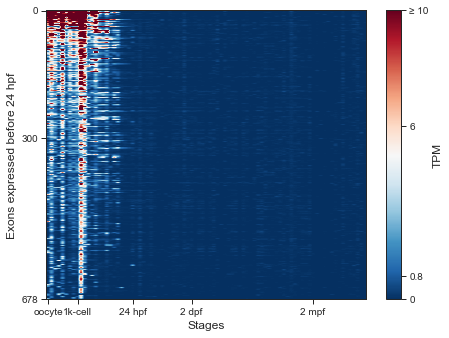

In [174]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    plot_df = final_tableS2.iloc[:,3:90].drop_duplicates().copy()
    plot_df['rank'] = plot_df.mean(axis = 1)
    plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
    fig, ax = plt.subplots(figsize = (6.4, 4.8), tight_layout = True)
    pos = ax.imshow(plot_df,
                  aspect = 'auto',
                  vmax = 10,
                  vmin = 0,
                  cmap = 'RdBu_r'
                )

#     ax.set_yticks([0,500,984])
    ax.set_yticks([0,300,678])
    ax.set_yticklabels(['0', '300', '678'])
    ax.set_ylabel('Exons expressed before 24 hpf')
    ax.set_xticks([0, 8, 23, 39, 72])
#     ax.set_xticks(range(88))
#     ax.set_xticklabels(plot_df.columns, rotation = 90)
    ax.set_xticklabels(['oocyte', '1k-cell', '24 hpf', '2 dpf', '2 mpf'])
    ax.set_xlabel('Stages')
    ax.set_title('')
#     else :
#         fig, ax = plt.subplots(figsize = (4, 3), tight_layout = True)
#         cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
#         cbar.set_label('Normalized TPM')
#         cbar.ax.set_yticklabels([str(x) for x in range(11)])                 

    fig.subplots_adjust(right=0.85)
#     cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
#     fig.colorbar(pos, cax=cbar_ax)
    cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[0, 0.8, 6, 10])
    cbar.set_label('TPM')
    cbar.ax.set_yticklabels(['0', '0.8', '6', '≥ 10']) 
    
#     fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_filteredExon985_expr.pdf', transparent = True)
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_x_heatmap_filteredExon678Gene361_expr.pdf', transparent = True)
    

# CDD class bar plot

In [54]:
CDD_superclass_number = final_tableS2_filterK36Pol2_ZGA[['Gene symbol', 'Domain']].copy()
CDD_superclass_number = pd.merge(CDD_superclass_number, CDD_domain_df_class_superclass[['gene_symbol', 'class', 'super_class']], how = 'left', left_on = 'Gene symbol', right_on = 'gene_symbol').drop_duplicates()
CDD_superclass_number['class_times'] = 1
CDD_superclass_number_classgroup = CDD_superclass_number[['class', 'class_times']].dropna().groupby(['class']).sum().reset_index()
CDD_superclass_number_classgroup = pd.merge(CDD_superclass_number_classgroup, CDD_superclass_number[['Domain', 'class']], on = 'class', how = 'left')
CDD_superclass_number_classgroup = CDD_superclass_number_classgroup.drop_duplicates()
CDD_superclass_number_classgroup

,class,class_times,Domain
0,DEK domain,1,Chromatin structure
1,FYVE/FYVE-like domain,4,Chromatin structure
2,FYVE/FYVE-like domain,4,DNA binding
5,Forkhead domain,1,DNA binding
6,H4 superfamily,1,Chromatin structure
7,Homeobox/Homeobox-like domain,1,DNA binding
8,Nucleoplasmin,1,Chromatin structure
9,RING_Ubox,5,Chromatin structure
10,RING_Ubox,5,DNA binding
14,RecF/RecN/SMC,11,Chromatin structure


In [55]:
CDD_superclass_number_classgroup['class_times'].sum()

73

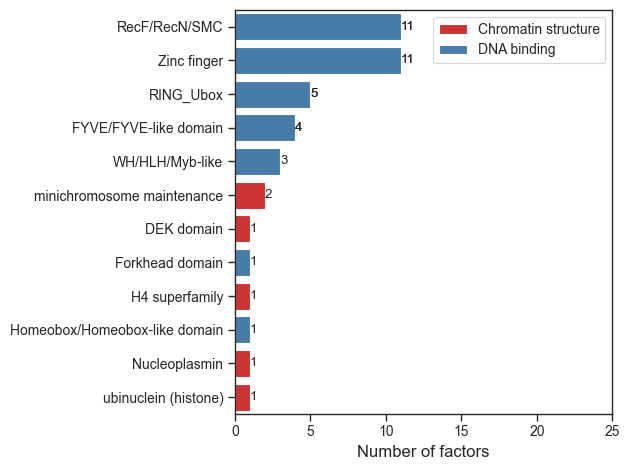

In [56]:
import math
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4, 4.8), tight_layout = True)
    h = sns.barplot(
        data = CDD_superclass_number_classgroup.sort_values(['class_times'], ascending = False),
        y = 'class',
        x = 'class_times', 
        hue = 'Domain',
        palette = 'Set1',
        dodge = False,
        orient = 'h')
    ax.set_xlim(0, 25)
    ax.set_xlabel('Number of factors')
    ax.set_ylabel('')
    for p in ax.patches:
        h, w, y = p.get_height(), p.get_width(), p.get_y()
        if math.isnan(float(w)) != True :
            xy = (w, y + h / 2.)
            text = f'{int(w)}'
            ax.annotate(text=text, xy=xy, ha='left', va='center')    
    
    ax.legend().set_title('')
        
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_x_bar_CDD_domain_TPM6_TPM0p8.pdf',transparent=True)


# Ribo-seq box plot

In [128]:
final_tableS2_filterK36Pol2_ZGA_CDD.head()

,Gene symbol,Transcript ID,Exon ID,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,...,late embryo & tissue max TPM,H3K36me3 RPKM,Pol II (4H8) RPKM,Pol II (8WG16) RPKM,if in public early transcribed gene list,Domain,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds,If at cytoplasm or cytoskeleton,If pass RT-PCR validation
8,ubn1,ENSDART00000146065.4,ENSDART00000146065.4.15_ENSDART00000114876.5.8,7.492041,0.711239,0.000000,2.600014,1.402099,3.311170,1.498341,...,0.583217,0.043447,0.024257,0.023131,False,Chromatin structure,13.083873,0.235650,Excluded in previous step,Excluded in previous step
9,ubn1,ENSDART00000114876.5,ENSDART00000146065.4.15_ENSDART00000114876.5.8,7.492041,0.711239,0.000000,2.600014,1.402099,3.311170,1.498341,...,0.583217,0.082924,0.024257,0.023131,False,Chromatin structure,13.330320,0.435543,Excluded in previous step,Excluded in previous step
10,ubn1,ENSDART00000132812.2,ENSDART00000146065.4.15_ENSDART00000114876.5.8,7.492041,0.711239,0.000000,2.600014,1.402099,3.311170,1.498341,...,0.583217,0.145310,0.025368,0.023950,False,Chromatin structure,6.388008,0.000000,Excluded in previous step,Excluded in previous step
420,ftr81,ENSDART00000177841.2,ENSDART00000177841.2.5,0.086045,6.088208,1.707729,0.337104,1.766599,0.282638,1.371402,...,0.438507,0.016630,0.016812,0.015067,False,Chromatin structure,28.001542,1.005472,False,True
421,ftr81,ENSDART00000177841.2,ENSDART00000177841.2.5,0.086045,6.088208,1.707729,0.337104,1.766599,0.282638,1.371402,...,0.438507,0.016630,0.016812,0.015067,False,DNA binding,28.001542,1.005472,False,True


<ipython-input-187-3aa38a377e0a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['if_select'] = ['Selected' if x else 'Filtered' for x in ((plot_df['Ribo-seq rpf_0h_cds'] > 15) & (plot_df['Ribo-seq rpf_0h_cds'] > 5 * plot_df['Ribo-seq rpf_24h_cds'])).tolist()]
<ipython-input-187-3aa38a377e0a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['fold'] = plot_df['Ribo-seq rpf_0h_cds'] / plot_df['Ribo-seq rpf_24h_cds']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Selected v.s. Filtered: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.945e-13 U_stat=2.891e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Selected v.s. Filtered: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.946e-02 U_stat=1.962e+03


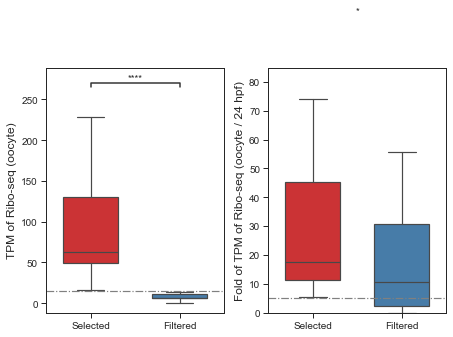

In [187]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = final_tableS2_filterK36Pol2_ZGA_CDD[['Transcript ID', 'Ribo-seq rpf_0h_cds', 'Ribo-seq rpf_24h_cds']]
    plot_df['if_select'] = ['Selected' if x else 'Filtered' for x in ((plot_df['Ribo-seq rpf_0h_cds'] > 15) & (plot_df['Ribo-seq rpf_0h_cds'] > 5 * plot_df['Ribo-seq rpf_24h_cds'])).tolist()]
    plot_df['fold'] = plot_df['Ribo-seq rpf_0h_cds'] / plot_df['Ribo-seq rpf_24h_cds']
    fig, axes = plt.subplots(1, 2, figsize = (6.4, 4.8), tight_layout = True)
    sns.boxplot(
        data = plot_df,
        x = 'if_select',
        y = 'Ribo-seq rpf_0h_cds',
        order = ['Selected', 'Filtered'],
        ax = axes[0],
        palette = 'Set1',
        width = .618,
        showfliers = False
    )
    
    add_stat_annotation(axes[0], data=plot_df, x='if_select', y='Ribo-seq rpf_0h_cds', order = ['Selected', 'Filtered'],
                box_pairs=[('Selected', 'Filtered')],
                 test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

    
    axes[0].set_ylabel('TPM of Ribo-seq (oocyte)')
    axes[0].axline((0,15), (1,15), ls = '-.', color = 'grey')
    axes[0].set_xlabel('')
    
    sns.boxplot(
        data = plot_df,
        x = 'if_select',
        y = 'fold',
        order = ['Selected', 'Filtered'],
        ax = axes[1],
        palette = 'Set1',
        width = .618,
        showfliers = False
    )
    
    add_stat_annotation(axes[1], data=plot_df, x='if_select', y='fold', order = ['Selected', 'Filtered'],
                box_pairs=[('Selected', 'Filtered')],
                 test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

    
    axes[1].set_ylabel('Fold of TPM of Ribo-seq (oocyte / 24 hpf)')
    axes[1].axline((0,5), (1,5), ls = '-.', color = 'grey')
    axes[1].set_xlabel('')
    axes[1].set_ylim(0,85)
    
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_x_box_RiboSeq_selected_filtered.pdf', 
                transparent = True)

In [177]:
    add_stat_annotation(axes[0], data=plot_df, x='if_select', y='Ribo-seq rpf_0h_cds', order = ['Selected', 'Filtered'],
                box_pairs=[('Selected', 'Filtered')],
                 test='Mann-Whitney', text_format='star', loc='inside', verbose=2)    

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Selected v.s. Filtered: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.945e-13 U_stat=2.891e+03


(<AxesSubplot:ylabel='TPM of Ribo-seq (oocyte)'>,
 [<statannot.StatResult.StatResult at 0x7fd2d21b1df0>])

<Figure size 432x288 with 0 Axes>

In [186]:
    add_stat_annotation(axes[1], data=plot_df, x='if_select', y='fold', order = ['Selected', 'Filtered'],
                box_pairs=[('Selected', 'Filtered')],
                 test='Mann-Whitney', text_format='star', loc='inside', verbose=2)   

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Selected v.s. Filtered: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.946e-02 U_stat=1.962e+03


(<AxesSubplot:ylabel='Fold of TPM of Ribo-seq (oocyte / 24 hpf)'>,
 [<statannot.StatResult.StatResult at 0x7fd2d1b7a370>])

<Figure size 432x288 with 0 Axes>

In [179]:
plot_df

,Transcript ID,Ribo-seq rpf_0h_cds,Ribo-seq rpf_24h_cds,if_select,fold
8,ENSDART00000146065.4,13.083873,0.235650,Filtered,55.522508
9,ENSDART00000114876.5,13.330320,0.435543,Filtered,30.606210
10,ENSDART00000132812.2,6.388008,0.000000,Filtered,inf
420,ENSDART00000177841.2,28.001542,1.005472,Selected,27.849156
421,ENSDART00000177841.2,28.001542,1.005472,Selected,27.849156
...,...,...,...,...,...
1860,ENSDART00000142233.2,52.508025,4.300226,Selected,12.210528
1861,ENSDART00000142233.2,52.508025,4.300226,Selected,12.210528
1862,ENSDART00000142233.2,52.508025,4.300226,Selected,12.210528
2270,ENSDART00000169302.2,0.000000,0.017452,Filtered,0.000000


!!! use the p value from scipy

In [189]:
import scipy
scipy.stats.mannwhitneyu(plot_df.loc[plot_df['if_select']=='Selected']['Ribo-seq rpf_0h_cds'], 
                         plot_df.loc[plot_df['if_select']=='Filtered']['Ribo-seq rpf_0h_cds'])


MannwhitneyuResult(statistic=134.0, pvalue=3.9722687504054233e-13)

In [190]:
scipy.stats.mannwhitneyu(plot_df.loc[plot_df['if_select']=='Selected']['fold'], 
                         plot_df.loc[plot_df['if_select']=='Filtered']['fold'])


MannwhitneyuResult(statistic=1062.5, pvalue=0.009730892257118318)

In [191]:
scipy.__version__

'1.5.4'